In [1]:
from model.model import *
from preprocess import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


In [36]:
df = spike_preprocess(alldat)

session 0
session 1
session 2
session 3
session 4
session 5
session 6
session 7
session 8
session 9
session 10
session 11
session 12
session 13
session 14
session 15
session 16
session 17


KeyboardInterrupt: 

# Filter the Dataframe

## Filter Settings

In [60]:
trials = np.arange(10);
sessions = [0]
regions = ["ACA"]

## Filter Calculations

In [61]:
aca = df[df["region"].isin(regions)];
aca = aca[aca["session"].isin(sessions)];
aca = aca[aca["trial"].isin(trials)];

# Sort Neurons by Mean Spike Rate

In [59]:
df['mean_rate'] = np.mean((df.iloc[:, :250] > 0).to_numpy(),axis=1)
df = df.sort_values('mean_rate',ascending=False)

# Recenter the Spike Array
Feedback times can be indexed at `centered_array[:,max_add_len]`

In [76]:
center = 'feedback_time'
aca['center'] = np.floor(df[center]*1000/10)

max_val = np.max(aca.center.values)
min_val = np.min(aca.center.values)
max_shift = max_val-min_val

vals = aca.iloc[:, :250].values
center_vals = aca['center'].values
sh = vals.shape
centered_array = np.zeros([sh[0],int(sh[1] + max_shift)])

229.0


In [77]:
# Breaking here
for n in np.arange(sh[0]):
    start = int(center_vals[n]-(max_val-max_shift))
    end = int(start + sh[1])
    centered_array[n,start:end] = vals[n]

# Plot a Heatmap of Spikes Centered at 0

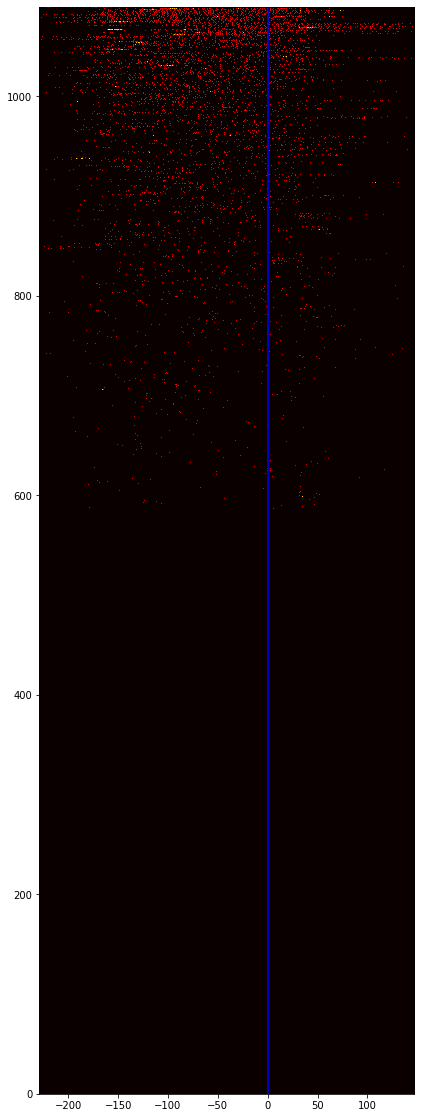

In [82]:
plt.figure(figsize=(20, 20))
plt.imshow(centered_array[:], cmap='hot',extent=(-max_val,max_shift,0,sh[0]))
plt.axvline(x=0,color='blue')